<a href="https://colab.research.google.com/github/Hassanat-Awodipe/DPhi_Bootcamp/blob/main/Copy_of_DPhi_Pandas_Bootcamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPhi Pandas Assignment Details

Dear Learner, 

Congratulations, you have studied Pandas all the way through the end of this bootcamp!!! This is the final graded hands-on exercise where you will be accomplishing the below mentioned task.

# Step 1: Select a Dataset of your choice

*   https://www.kdnuggets.com/datasets/index.html
*   https://dphi.tech/challenges/#past 
* https://pub.towardsai.net/best-datasets-for-machine-learning-data-science-computer-vision-nlp-ai-c9541058cf4f  
* https://medium.com/analytics-vidhya/top-100-open-source-datasets-for-data-science-cd5a8d67cc3d


or you can pick any dataset of your interest on the internet and add reference to it

# Evaluation Criteria

Your submission will be evaluated using the following criteria:

* You must ensure that the dataset is tabular.  
* You must ask and answer at least 3 questions about the dataset
*   Your submission must include explanations using markdown cells, apart from the code.
*   Your work must not be plagiarized i.e. copied for somewhere else.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Online Shopping data.csv to Online Shopping data.csv


#Step 2: Perform Data Cleaning/Preparation & Analysis

1. Create data frame(s) from CSV files
2. Perform index operations on data frame(s)
3. Apply Group, merge and aggregate data frame(s)
4. Check for missing and invalid values in data
5. Propose a way to treat the missing and invalid values and implement the same on the dataframe
5. Compute the mean, sum, range and other interesting statistics for numeric columns


In [4]:
shop_int_data = pd.read_csv("Online Shopping data.csv")
shop_int_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0
4,4,37.25,1,5.0,50,1295.008333,0.000893,0.015595,0.000000,0.0,Nov,3,2,4,2,Returning_Visitor,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,0
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0
9862,1,46.00,0,0.0,98,3098.649444,0.018814,0.037473,6.153201,0.0,Aug,2,2,6,1,Returning_Visitor,False,0


This is the dataset for an online shoppig website. Each entry is for a unique session, independent of the user.

A session is a group of user interactions with your website that takes place within a given time frame. A single user can open multiple sessions but not concurrently. Opening multiple pages on different tabs of the same website is counted as a single session as long as the session is still counting. By default, a session ends based on time (after 30mins of inactivity or at midnight or campaign change (if a user arrives via one campaign, leaves, and then comes back via a different campaign)

The administrative, informational and product related describe the types of pages of the website. The duration represents the amount of time spent on that particular page.

According to Google analytics, bounce rate is the percentage of all sessions on your site in which users viewed only a single page(first page) and triggered only a single request to the Analytics server. Exit Rate is the percentage that were the last in the session, for all pageviews that lead to the page.

For example, a user finds their way to a page on your website and then closes the website without clicking any button on it. Here the bounce rate is a 100%. If the user decides to click a button or two more buttons that lead to other pages of the website then the bounce rate for that first page no longer exists. An exit rate would exist for the last page before he closes the website. There is neither a bounce nor exit rate for pages in between. This is not to say that bounce and exit rates are mutually exclusive but it will depend on the number of sessions considered.

Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue. If the session does not end up as a revenue, page value will be still be recorded as long as the user makes it to the goal page. Each page has its own pagevalue, if set.


All definitions have been gotten from [Google Analytics](https://support.google.com/analytics/?hl=en#topic=10737980)


In [5]:
#we view the information of the entire dataset. There are some columns that are unnecessary like operating system and browser but for now, we leave it in the table.
shop_int_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

From the info, there are no missing values. It is easy to see that there are no duplicated columns. We check for duplicated rows.

In [6]:
#we check for duplicated rows as this can cause a bias in our analysis
shop_int_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9859    False
9860    False
9861    False
9862    False
9863    False
Length: 9864, dtype: bool

In [7]:
#at first we dont see that there are duplicates but,
shop_int_data.duplicated().sum()

92

In [8]:
#view the duplicated rows in the dataset
shop_int_data[shop_int_data.duplicated() == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
998,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,13,Returning_Visitor,False,0
1087,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,2,1,Returning_Visitor,False,0
1206,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,8,1,Returning_Visitor,False,0
1698,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,1,Returning_Visitor,False,0
1849,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,6,4,Returning_Visitor,True,0
9630,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,3,2,1,13,Returning_Visitor,False,0
9719,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,June,2,2,1,1,Returning_Visitor,False,0
9724,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,0


In [9]:
#assign the data bool_series. Keep only the first of duplicates. False shows that there are not duplicates.
bool_series = shop_int_data.duplicated(keep='first')

bool_series

0       False
1       False
2       False
3       False
4       False
        ...  
9859    False
9860    False
9861    False
9862    False
9863    False
Length: 9864, dtype: bool

In [10]:
#Take all False and store as the data but NOT True. View the dataset without the duplicated rows
shop_int_data = shop_int_data[~bool_series]

shop_int_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0
4,4,37.25,1,5.0,50,1295.008333,0.000893,0.015595,0.000000,0.0,Nov,3,2,4,2,Returning_Visitor,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,0
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0
9862,1,46.00,0,0.0,98,3098.649444,0.018814,0.037473,6.153201,0.0,Aug,2,2,6,1,Returning_Visitor,False,0


After removing the duplicates, we have 9772 rows to work with.

`Another cleaning is to consider the page views, their duration. we could have said if more than 1 page was viewed then the duration cannot be zero but we did not because it is possible to switch from one page to another within a min.`

In [11]:
#if more than two administrative pages were viewed then the administration duration cannot be 0
shop_int_data[(shop_int_data['Administrative'] > 2) & (shop_int_data['Administrative_Duration'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [12]:
#if no administrative page was viewed then the administrative duration cannot be greater than 0. Note than one administrative page can be viewed and the duration 
#will still be zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['Administrative'] == 0) & (shop_int_data['Administrative_Duration'] > 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [13]:
#if more than two informational pages were viewed then the duration cannot be 0
shop_int_data[(shop_int_data['Informational'] >  2) & (shop_int_data['Informational_Duration'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [14]:
#if no informational page was viewed then the duration cannot be greater than 0. Note than one informational page can be viewed and the duration will still be 
#zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['Informational'] == 0) & (shop_int_data['Administrative_Duration'] > 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0
6,3,30.50,0,0.0,23,422.730303,0.008333,0.012500,0.000000,0.0,May,2,2,1,4,Returning_Visitor,False,0
8,1,56.00,0,0.0,7,92.500000,0.088889,0.122222,0.000000,0.4,May,3,2,1,13,Returning_Visitor,False,0
13,1,4.00,0,0.0,37,1296.942857,0.013889,0.039815,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,0
9858,6,85.20,0,0.0,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,0
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0
9862,1,46.00,0,0.0,98,3098.649444,0.018814,0.037473,6.153201,0.0,Aug,2,2,6,1,Returning_Visitor,False,0


In [15]:
#if more than two product related pages were viewed then the duration cannot be 0
shop_int_data[(shop_int_data['ProductRelated'] >  2) & (shop_int_data['ProductRelated_Duration'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
525,0,0.0,0,0.0,5,0.0,0.20,0.20,0.0,0.0,Jul,3,2,2,13,Returning_Visitor,True,0
860,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.0,Nov,1,1,6,6,Returning_Visitor,False,0
1006,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.0,Nov,3,2,4,3,Returning_Visitor,True,0
1387,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.0,Nov,3,2,1,10,Returning_Visitor,False,0
1484,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.0,Aug,1,1,3,4,Returning_Visitor,False,0
1646,0,0.0,0,0.0,5,0.0,0.20,0.20,0.0,0.0,Nov,2,2,2,1,Returning_Visitor,False,0
1654,0,0.0,0,0.0,5,0.0,0.20,0.20,0.0,0.0,May,3,2,5,6,Returning_Visitor,False,0
2184,2,23.2,0,0.0,3,0.0,0.08,0.12,0.0,0.0,Aug,2,2,3,5,New_Visitor,False,0
2500,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.6,May,3,2,1,13,Returning_Visitor,False,0
2593,0,0.0,0,0.0,3,0.0,0.20,0.20,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,0


It is easy to guess that these sessions did not yield a revenue because the product related page was opened but no further action taken. No event was recorded since the duration is 0.0. All the multiple pages must have been opened on different tabs of the browser and subsequently closed.

In [16]:
#if no product related page was viewed then the duration cannot be greater than 0. Note than 1 product related page can be viewed and the duration will still 
#be zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['ProductRelated'] == 0) & (shop_int_data['ProductRelated_Duration'] > 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


Another cleaning to consider is that of the page value. Looking through the entire dataset, we can see that there is a column for pagevalue. This means that a goal page and its corresponding value must have been set on the website. The ecommerce transaction page would also have a page value which is the price of the transaction.

In [17]:
#if revenue equals to 1 then page value cannot be zero
shop_int_data[(shop_int_data['Revenue'] ==  1) & (shop_int_data['PageValues'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,4,37.250000,1,5.0,50,1295.008333,0.000893,0.015595,0.0,0.0,Nov,3,2,4,2,Returning_Visitor,True,1
38,1,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,False,1
44,0,0.000000,0,0.0,24,452.416667,0.000000,0.020833,0.0,0.0,Nov,2,2,3,2,Returning_Visitor,True,1
61,9,210.566667,3,61.6,10,124.866667,0.021053,0.030526,0.0,0.0,Aug,1,1,3,2,Returning_Visitor,False,1
106,0,0.000000,0,0.0,73,3324.597222,0.017123,0.040274,0.0,0.0,Nov,2,2,1,13,New_Visitor,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,0,0.000000,0,0.0,145,4108.808442,0.007552,0.023217,0.0,0.0,Nov,2,2,4,2,Returning_Visitor,False,1
9599,6,315.166667,1,85.0,10,402.805556,0.014286,0.014286,0.0,0.0,Dec,3,2,2,2,New_Visitor,False,1
9676,6,116.697368,0,0.0,171,9405.836721,0.008313,0.028256,0.0,0.0,Dec,3,2,3,2,Returning_Visitor,False,1
9694,6,254.000000,0,0.0,48,1740.525631,0.000000,0.004877,0.0,0.0,Nov,1,1,3,2,New_Visitor,False,1


In this case, we may want to assume that the pages viewed including the page for ecommerce trnasaction has no page value set or were not included as a goal page. 



It appears that there are more unset pagevalues than set pagevalues. This we will see by comparing the page value and the product related page. 

In [18]:
#a product related page was viewed and a pagevalue was not assigned.

shop_int_data[(shop_int_data['ProductRelated'] >  0) & (shop_int_data['PageValues'] ==  0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.0,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.0,0.0,May,3,3,4,2,New_Visitor,True,0
4,4,37.25,1,5.0,50,1295.008333,0.000893,0.015595,0.0,0.0,Nov,3,2,4,2,Returning_Visitor,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,7,257.40,0,0.0,7,244.733333,0.018182,0.018182,0.0,0.0,Nov,1,1,4,2,New_Visitor,False,0
9857,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.0,0.0,Nov,2,2,1,2,Returning_Visitor,False,0
9858,6,85.20,0,0.0,11,203.000000,0.000000,0.000000,0.0,0.0,Nov,2,2,5,2,Returning_Visitor,False,0
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.0,0.0,Mar,1,2,1,1,Returning_Visitor,False,0


Once again this proves that, some page value were not set.

If we are sure that a page value is set (because other sessions have a page value), then page values cannot be zero when there is a revenue and/or when a product related page is viewed (greater than 0).

In any circumstance, the page for the online payment is supposed to have a page value. Therefore, we shall clean the above data where revenue is 1 and pagevalue is 0.

In [19]:
#assuming a pagevalue is set for the payment page, let us delete the rows where pagevalue is 0 and revenue is 1 because it 
#is very likely a false revenue.

false_revenue1 = shop_int_data[(shop_int_data['PageValues'] ==  0) & (shop_int_data['Revenue'] == 1)].index

shop_int_data.drop(false_revenue1, inplace = True)

shop_int_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0
5,0,0.00,0,0.0,4,66.000000,0.000000,0.050000,0.000000,0.0,Dec,1,1,8,2,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,0
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0
9862,1,46.00,0,0.0,98,3098.649444,0.018814,0.037473,6.153201,0.0,Aug,2,2,6,1,Returning_Visitor,False,0


In [20]:
#similarly, if no revenue was made then page value cannot be greater than 0.
shop_int_data[(shop_int_data['PageValues'] >  0) & (shop_int_data['Revenue'] == 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
15,11,293.622222,2,42.2,64,1831.942222,0.000000,0.015238,16.351559,0.0,Nov,2,5,3,4,New_Visitor,True,0
17,6,265.041667,0,0.0,59,2934.236722,0.006667,0.022333,6.099899,0.0,Nov,1,2,1,2,Returning_Visitor,False,0
20,9,794.883333,0,0.0,36,1697.550000,0.017500,0.025750,24.614250,0.2,May,2,2,1,4,Returning_Visitor,False,0
21,5,69.033333,0,0.0,24,658.846667,0.000000,0.013793,42.984531,0.0,Oct,2,6,3,2,New_Visitor,False,0
27,10,299.603175,2,166.0,86,2559.541228,0.008333,0.008588,2.087783,0.0,May,3,2,7,5,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,6,162.700000,6,205.0,52,2983.358135,0.010113,0.017261,17.476715,0.0,Nov,3,2,4,2,Returning_Visitor,False,0
9840,12,295.961905,1,0.0,45,2033.845238,0.000000,0.007154,21.232449,0.0,Nov,2,2,9,2,Returning_Visitor,False,0
9846,6,239.333333,0,0.0,31,1875.169444,0.000000,0.025325,21.859584,0.0,Nov,1,1,1,2,Returning_Visitor,False,0
9850,8,173.411551,0,0.0,162,5721.800123,0.001143,0.009090,17.798126,0.0,Oct,2,2,1,1,Returning_Visitor,False,0


In [21]:
false_revenue2 = shop_int_data[(shop_int_data['PageValues'] >  0) & (shop_int_data['Revenue'] == 0)].index

shop_int_data.drop(false_revenue2, inplace = True)

shop_int_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0
5,0,0.00,0,0.0,4,66.000000,0.000000,0.050000,0.000000,0.0,Dec,1,1,8,2,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,6,85.20,0,0.0,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,0
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,0
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0


This brings us to the end of cleaning the data. Now, lets check the info to identify any changes.

In [22]:
shop_int_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8568 non-null   int64  
 1   Administrative_Duration  8568 non-null   float64
 2   Informational            8568 non-null   int64  
 3   Informational_Duration   8568 non-null   float64
 4   ProductRelated           8568 non-null   int64  
 5   ProductRelated_Duration  8568 non-null   float64
 6   BounceRates              8568 non-null   float64
 7   ExitRates                8568 non-null   float64
 8   PageValues               8568 non-null   float64
 9   SpecialDay               8568 non-null   float64
 10  Month                    8568 non-null   object 
 11  OperatingSystems         8568 non-null   int64  
 12  Browser                  8568 non-null   int64  
 13  Region                   8568 non-null   int64  
 14  TrafficType             

# Step 3: Exploration & Inference

1. Ask at least 3 interesting questions about your dataset
2. Answer the questions by computing the results using Pandas library
3. Add concluding remarks


#**1. How many percentage of the dataset yielded a revenue?**

In [23]:
#all rows for positive revenue
shop_int_data[shop_int_data['Revenue'] == 1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11,10,163.633333,1,294.0,80,1979.300000,0.002326,0.024225,19.733354,0.0,Nov,2,1,2,2,Returning_Visitor,True,1
19,6,167.000000,0,0.0,71,1445.458333,0.004054,0.013964,12.308117,0.0,Nov,3,2,1,10,Returning_Visitor,False,1
70,0,0.000000,0,0.0,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True,1
80,1,21.000000,0,0.0,13,1474.500000,0.000000,0.016667,69.461758,0.0,Dec,2,2,4,3,New_Visitor,False,1
102,10,187.694444,5,495.5,122,2743.213113,0.000199,0.005114,1.483211,0.0,Nov,2,2,1,2,Returning_Visitor,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,4,46.458333,0,0.0,82,2875.615909,0.000000,0.007267,27.757870,0.0,Nov,2,4,3,1,Returning_Visitor,False,1
9833,9,204.083333,0,0.0,63,3552.702381,0.000000,0.007000,19.955723,0.0,Mar,1,2,8,8,New_Visitor,False,1
9839,0,0.000000,0,0.0,4,72.000000,0.000000,0.000000,35.349670,0.0,Sep,3,2,3,2,Returning_Visitor,True,1
9859,0,0.000000,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1


In [24]:
#no of rows with positive revenue times 100 divided by the total no of rows after cleaning

(1239 * 100)/ 8568

14.46078431372549

14% of the entire dataset yielded a postive revenue. Some of the positive revenue were cleaned out as false revenue.

263 revenue were from New visitors and 11 from Other visitos while the rest (965) were from returning visitors. 

86% of the dataset yielded zero revenue. This means we have more data for no revenue than for revenue.

Although there are less entries for revenue, most of the analysis will be based on revenue to see how the ecommerce company can further improve on them.

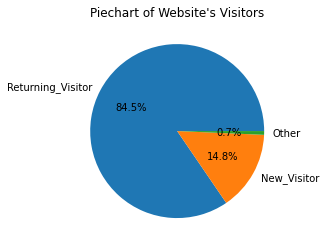

In [25]:
#representation of all website visitors

visitor_numbers = shop_int_data['VisitorType'].value_counts()
plt.title("Piechart of Website's Visitors")

visitor_type = ['Returning_Visitor','New_Visitor', 'Other' ]
plt.pie(visitor_numbers, labels = visitor_type, autopct='%0.1f%%')

print('')
plt.show() 

#**2. What region did most visitors come from?**

In [26]:
#region of visitors
shop_int_data['Region'].value_counts()

1    3342
3    1623
4     819
2     788
6     586
7     546
9     356
8     291
5     217
Name: Region, dtype: int64

In [27]:
#visitors were mostly from region 1.
shop_int_data[(shop_int_data['Region']==1) & (shop_int_data['Revenue'] == 1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
19,6,167.000000,0,0.0,71,1445.458333,0.004054,0.013964,12.308117,0.0,Nov,3,2,1,10,Returning_Visitor,False,1
102,10,187.694444,5,495.5,122,2743.213113,0.000199,0.005114,1.483211,0.0,Nov,2,2,1,2,Returning_Visitor,False,1
103,5,140.600000,0,0.0,81,2408.312828,0.002554,0.007459,23.075815,0.0,Oct,2,4,1,2,Returning_Visitor,False,1
127,11,494.533333,0,0.0,33,2070.616667,0.000000,0.020721,9.581162,0.0,Nov,2,5,1,3,Returning_Visitor,False,1
140,6,206.030000,0,0.0,129,3778.345000,0.010687,0.024612,2.169470,0.0,Oct,2,2,1,3,Returning_Visitor,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,1,3.000000,0,0.0,26,885.000000,0.000000,0.036111,17.545500,0.0,May,2,2,1,2,Returning_Visitor,False,1
9752,0,0.000000,0,0.0,7,728.800000,0.000000,0.000000,58.924177,0.0,Aug,4,2,1,2,Returning_Visitor,False,1
9786,2,64.500000,1,0.0,97,2696.108730,0.003436,0.021409,5.770973,0.0,Nov,2,2,1,13,Returning_Visitor,False,1
9809,1,17.000000,4,32.0,11,948.000000,0.013333,0.016667,25.484000,0.6,May,2,2,1,6,Returning_Visitor,False,1


In [28]:
#483 shoppers from region 1.
#this line of code also shows that region 1 has the highest number of shoppers.
shop_int_data[(shop_int_data['Revenue']==1)]['Region'].value_counts()

1    483
3    221
2    132
4    120
7     82
6     73
9     60
5     35
8     33
Name: Region, dtype: int64

Most of the website visitors are from region 1. And most of the visitors who actually bought are also from region 1. There are 9 regions in total.

#**3. What is the average time needed for a visitor to decide to make a purchase?**

In [29]:
#addition of all durations
total_time = shop_int_data.Administrative_Duration + shop_int_data.Informational_Duration + shop_int_data.ProductRelated_Duration
print(total_time)

0        354.000000
1        764.666667
2        285.900000
3        318.000000
5         66.000000
           ...     
9858     288.200000
9859    1040.100000
9860       0.000000
9861     446.000000
9863    1534.125000
Length: 8568, dtype: float64


In [30]:
#to find the session number, we create a column for total_time so that it can be easily matched to the session number entry.
shop_int_data['total_time'] = total_time
shop_int_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,2,New_Visitor,True,0,354.000000
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,10,Returning_Visitor,False,0,764.666667
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,3,Returning_Visitor,True,0,285.900000
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,2,New_Visitor,True,0,318.000000
5,0,0.00,0,0.0,4,66.000000,0.000000,0.050000,0.000000,0.0,Dec,1,1,8,2,Returning_Visitor,False,0,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,6,85.20,0,0.0,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,0,288.200000
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1,1040.100000
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,1,Returning_Visitor,False,0,0.000000
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,4,Returning_Visitor,False,0,446.000000


In [31]:
#find max, mean, min of total_time
revenue_time = shop_int_data[(shop_int_data['Revenue']==1)]['total_time']
max(revenue_time), revenue_time.mean(), min(revenue_time)

(23340.8109167, 2114.378274063086, 15.6)

This shows that the minimum duration for a user to decide to make a purchase is 15.6s, the max duration is 23340s and the average duration is 2114s. 

Spending a longer duration on the website also does not indicate that the user will be convinced to buy. The highest duration spent on this website is 47850.92 and it yielded 0 revenue. 

#**4. What browser and operating system is mostly used? How does this affect navigating the website and making a purchase?**

In [32]:
#OS mostly used
shop_int_data['OperatingSystems'].value_counts()

2    4555
3    1805
1    1793
4     340
8      56
6      12
7       4
5       3
Name: OperatingSystems, dtype: int64

In [33]:
#Browser mostly used
shop_int_data['Browser'].value_counts()

2     5512
1     1709
4      504
5      328
6      120
10     120
8      100
3       82
13      44
7       37
12       8
11       3
9        1
Name: Browser, dtype: int64

In [34]:
#displaying the data of the most used browser and OS with positive revenue
shop_int_data[(shop_int_data['OperatingSystems']==2) & (shop_int_data['Browser']==2) & (shop_int_data['Revenue']==1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
70,0,0.000000,0,0.0,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True,1,340.000000
80,1,21.000000,0,0.0,13,1474.500000,0.000000,0.016667,69.461758,0.0,Dec,2,2,4,3,New_Visitor,False,1,1495.500000
102,10,187.694444,5,495.5,122,2743.213113,0.000199,0.005114,1.483211,0.0,Nov,2,2,1,2,Returning_Visitor,False,1,3426.407557
140,6,206.030000,0,0.0,129,3778.345000,0.010687,0.024612,2.169470,0.0,Oct,2,2,1,3,Returning_Visitor,False,1,3984.375000
165,2,44.000000,0,0.0,44,724.316667,0.000000,0.011364,19.212189,0.0,May,2,2,3,2,Returning_Visitor,False,1,768.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,2,57.500000,0,0.0,16,1226.000000,0.000000,0.012500,143.476678,0.0,Dec,2,2,9,2,New_Visitor,True,1,1283.500000
9786,2,64.500000,1,0.0,97,2696.108730,0.003436,0.021409,5.770973,0.0,Nov,2,2,1,13,Returning_Visitor,False,1,2760.608730
9809,1,17.000000,4,32.0,11,948.000000,0.013333,0.016667,25.484000,0.6,May,2,2,1,6,Returning_Visitor,False,1,997.000000
9859,0,0.000000,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,2,New_Visitor,False,1,1040.100000


In [35]:
#when revenue is 0
shop_int_data[(shop_int_data['OperatingSystems']==2) & (shop_int_data['Browser']==2) & (shop_int_data['Revenue']==0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
6,3,30.50,0,0.0,23,422.730303,0.008333,0.012500,0.0,0.0,May,2,2,1,4,Returning_Visitor,False,0,453.230303
7,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,May,2,2,1,1,Returning_Visitor,False,0,0.000000
13,1,4.00,0,0.0,37,1296.942857,0.013889,0.039815,0.0,0.8,May,2,2,4,2,Returning_Visitor,False,0,1300.942857
25,2,73.75,0,0.0,20,546.669697,0.000000,0.004394,0.0,0.0,Oct,2,2,1,2,Returning_Visitor,False,0,620.419697
26,3,29.00,0,0.0,8,160.500000,0.000000,0.025000,0.0,0.0,May,2,2,9,3,Returning_Visitor,False,0,189.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,2,7,13,Returning_Visitor,False,0,0.000000
9854,0,0.00,0,0.0,63,1361.203175,0.000000,0.014762,0.0,0.0,Nov,2,2,7,2,Returning_Visitor,False,0,1361.203175
9855,2,6.00,0,0.0,37,501.766667,0.010256,0.020513,0.0,0.0,Sep,2,2,1,1,Returning_Visitor,False,0,507.766667
9857,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.0,0.0,Nov,2,2,1,2,Returning_Visitor,False,0,3610.048611


There are more zero revenue when browser 2 and OS 2 are used so this does not really affect the decision to make a purchase. However, it might make navigating the website much more easier.

#**4. Using the more desriptive traffic sources, analyse the dataset.**

The entries of traffic type for the dataset does not give enough information. Traffic type defines the method or medium by which visitors reach the website.

For this analysis and as an assumption, I have decided to group the numbers into 4 groups and assign each group a traffic medium:
1. 1-5 Direct traffic
2. 6-10 Organic referral
3. 11-15 Social referral
4. 16-20 Paid referral

Direct means that they directly used your URL link to get to the website. it could be that have it in their bookmarks.

Organic means they got to the website through a search engine like google, bing.

Social means they used a link found on social media like twitter, facebook, etc.

Paid means they clicked a sponosred ad that was paid for to promote the website.



In [36]:
#form the traffic groups and insert into the dataset
shop_int_data['TrafficType'].replace(dict.fromkeys([1, 2, 3, 4, 5], 'Direct'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([6, 7, 8, 9, 10], 'Organic'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([11, 12, 13, 14, 15], 'Social'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([16, 17, 18, 19, 20], 'Paid'), inplace = True)
shop_int_data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.000000,0.0,May,2,7,1,Direct,New_Visitor,True,0,354.000000
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,Organic,Returning_Visitor,False,0,764.666667
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.000000,0.0,Jul,3,2,1,Direct,Returning_Visitor,True,0,285.900000
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.000000,0.0,May,3,3,4,Direct,New_Visitor,True,0,318.000000
5,0,0.00,0,0.0,4,66.000000,0.000000,0.050000,0.000000,0.0,Dec,1,1,8,Direct,Returning_Visitor,False,0,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,6,85.20,0,0.0,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,Direct,Returning_Visitor,False,0,288.200000
9859,0,0.00,0,0.0,17,1040.100000,0.000000,0.013333,128.827869,0.0,Dec,2,2,5,Direct,New_Visitor,False,1,1040.100000
9860,0,0.00,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,Mar,1,2,1,Direct,Returning_Visitor,False,0,0.000000
9861,1,174.00,0,0.0,9,272.000000,0.013333,0.073333,0.000000,0.0,May,1,1,3,Direct,Returning_Visitor,False,0,446.000000


The numbers in the traffic column have been replaced by more descriptive traffic sources to a website.

In [37]:
#we group the dataset based on traffic type
traffic_data = shop_int_data.groupby(['TrafficType'])

#This shows the first members of each group
traffic_data.first() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,total_time
TrafficType,,,,,,,,,,,,,,,,,,
Direct,0,0.0,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,New_Visitor,True,0,354.000000
Organic,0,0.0,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,Returning_Visitor,False,0,764.666667
Paid,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,2,1,New_Visitor,True,0,0.000000
Social,1,56.0,0,0.0,7,92.500000,0.088889,0.122222,0.0,0.4,May,3,2,1,Returning_Visitor,False,0,148.500000


In [38]:
#we view all the members of organic traffic group
traffic_data.get_group('Organic')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
1,0,0.000000,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,Organic,Returning_Visitor,False,0,764.666667
16,1,19.666667,0,0.0,14,512.111111,0.028571,0.030000,0.000000,0.0,Mar,3,2,3,Organic,Returning_Visitor,True,0,531.777778
19,6,167.000000,0,0.0,71,1445.458333,0.004054,0.013964,12.308117,0.0,Nov,3,2,1,Organic,Returning_Visitor,False,1,1612.458333
24,4,229.250000,0,0.0,8,372.250000,0.022222,0.009524,0.000000,0.0,Dec,1,2,1,Organic,Returning_Visitor,False,0,601.500000
30,4,64.500000,0,0.0,28,852.333333,0.013793,0.024548,0.000000,0.0,May,2,2,1,Organic,New_Visitor,True,0,916.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,0,0.000000,0,0.0,8,215.000000,0.062500,0.058333,0.000000,1.0,May,2,5,7,Organic,Returning_Visitor,True,0,215.000000
9809,1,17.000000,4,32.0,11,948.000000,0.013333,0.016667,25.484000,0.6,May,2,2,1,Organic,Returning_Visitor,False,1,997.000000
9833,9,204.083333,0,0.0,63,3552.702381,0.000000,0.007000,19.955723,0.0,Mar,1,2,8,Organic,New_Visitor,False,1,3756.785714
9841,3,33.000000,2,84.5,4,46.500000,0.000000,0.010667,0.000000,0.0,Mar,2,2,5,Organic,New_Visitor,False,0,164.000000


The group is only formed in the traffic_data and does not apply to the main dataset called shop_int_data

**Q.  Bounce rate is calucated for the pages through which the user enters the website which we assume to be landing page for all sessions. How often did visitors click the wrong link? How does bounce rate affect the revenue?**

In reality, bounce rate is calculated when a visitor opens then closes the website. It is calculated for the first page of the website that a visitor gets to. For different users in one session, they will have different first pages depending on how they got to the website.

Because this is an ecommerce website and we expect visitors to view more than one page then a high bounce rate of 1 is bad.

In [39]:
#find the mean bounce rate
shop_int_data['BounceRates'].mean()

0.02236010932714743

0.02 is a quite low bounce rate. This means that the people who stayed and continued browsing after the landing page opened are more than those who bounced off for the overall sessions of the dataset.

In [40]:
#are there bounce rates that lead to a revenue? No.
shop_int_data[(shop_int_data['BounceRates']==1) & (shop_int_data['Revenue']==1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time


In [41]:
#are there bounce rates higher than the mean that leads to a revenue?
shop_int_data[(shop_int_data['BounceRates'] > 0.02) & (shop_int_data['Revenue']==1)]['TrafficType']

190     Organic
254      Direct
505      Direct
522      Social
1192       Paid
1418     Direct
1460       Paid
1533     Direct
1763     Direct
1822     Direct
1856     Direct
1964     Direct
2185     Social
2289     Direct
2306     Direct
2432     Direct
2560     Direct
2882     Direct
3063     Direct
3588     Direct
3939     Direct
4069     Direct
4336     Direct
4687     Direct
4689     Direct
4734     Direct
4836     Social
5112     Direct
5164     Direct
5261     Direct
5293     Direct
5436     Direct
5552     Direct
5576     Direct
5582     Direct
5667     Direct
5709     Direct
5800     Direct
5963     Direct
6168     Direct
6487     Direct
6507    Organic
6832     Direct
6915     Direct
7113     Direct
7204     Direct
8416     Direct
8601     Direct
8732     Direct
8814    Organic
9272    Organic
9355     Direct
9575     Direct
9645     Direct
9705     Social
Name: TrafficType, dtype: object

As we can see from the result of this code, more than one page was viewed even with a bounce rate higher than the mean bounce rate. 

For bounce rate, you are only concerned about the initial page and how it affects the rest of your intercation with the website. How many people entered through this page? Did they leave or did they continue to browse the website? A low rate means they stayed and a high rate means they left.

A higher percentage of visitors in the above result showed that they got to the website directly through its link, so they had no reason to leave and consequently made a purchase.

**Q) Exit rate is calculated for the pages through which the users leave the website. How often did these clicks make it to the revenue page**

Assume the exit rate here is for the payment page. Users leave the website through this page to the external payment platform e.g Paypal. So, we want a high exit rate.  

That the visitors got to the payment page does not guarentee that they will pay. A non zero page value is the only indicator that a payment was made (as we noted during the preparation of the data).

In [42]:
#find the mean exit rate for all the sessions.
shop_int_data['ExitRates'].mean()

0.044140405613794925

A mean of 0.04 shows that less people left through the payment page than those who, lets say, returned to the product related page or to the landing page.


**Q.) Do you think paid ads were effective for the purpose of special day?**

Special day is only recorded when there is a revenue.


In [43]:
#type of traffic for a special day purchase
shop_int_data[(shop_int_data['SpecialDay'] > 0)]['TrafficType'].value_counts()

Direct     704
Social     135
Organic     61
Paid        16
Name: TrafficType, dtype: int64

In [44]:
#view the count of each traffic type
shop_int_data['TrafficType'].value_counts()

Direct     6767
Organic     916
Social      720
Paid        165
Name: TrafficType, dtype: int64

Apparently, paid ads had no significant effect on purchases related to special day. 

A closer analysis shows that over 50% of the website visitors are by direct traffic. This suports the earlier analysis that 85% of the website visitors are Returning Visitors. This means that these visitors have a direct link to the website.

#**6.) Import a dataframe of age and sexes. Merge with the shop_int_data dataset and use if for the following analysis.**

As an assumption, this dataset will indicate the user for each session.

In [45]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [46]:
mall_customers = pd.read_csv('Mall_Customers.csv')
mall_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18



The annual income is in thousand dollars.

Since there are just 200 rows in the user dataset, we will create a smaller version of the shop_int_data dataset then merge with the user dataset.


In [47]:
#lets pick 200 rows between 5800 and 7000 of the shop_int_data
shop_int_data_short = shop_int_data.loc[5800:6027]
shop_int_data_short

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
5800,3,498.600000,1,152.20,25,1556.491429,0.036207,0.067625,5.689147,0.0,Jul,2,5,4,Direct,Returning_Visitor,True,1,2207.291429
5801,3,103.600000,0,0.00,30,440.533333,0.006452,0.021505,0.000000,0.0,Aug,2,2,2,Direct,Returning_Visitor,True,0,544.133333
5802,0,0.000000,0,0.00,63,1021.000000,0.026562,0.059896,0.000000,0.8,May,2,2,1,Direct,Returning_Visitor,False,0,1021.000000
5803,8,203.916667,4,114.75,118,3903.167094,0.004098,0.012520,55.011313,0.0,Nov,2,2,1,Direct,Returning_Visitor,False,1,4221.833761
5804,11,334.750000,0,0.00,20,598.778571,0.000000,0.007692,26.593538,0.2,May,2,10,1,Direct,New_Visitor,False,1,933.528571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,0,0.000000,0,0.00,23,1299.500000,0.034783,0.069565,0.000000,0.6,May,2,2,1,Direct,Returning_Visitor,False,0,1299.500000
6024,5,94.600000,0,0.00,69,2222.419048,0.005093,0.014961,0.000000,0.0,Oct,1,1,3,Direct,Returning_Visitor,False,0,2317.019048
6025,1,2.000000,0,0.00,143,5149.434919,0.004196,0.014489,0.000000,0.0,Nov,2,2,1,Direct,Returning_Visitor,True,0,5151.434919
6026,4,68.733333,0,0.00,44,2498.866667,0.000000,0.014444,11.330629,0.0,Oct,2,2,4,Direct,Returning_Visitor,False,1,2567.600000


In [48]:
#drop unneccsary columns
shop_int_data_short.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','BounceRates', 'ExitRates', 'PageValues', 'Month',	'OperatingSystems',	'Browser','total_time'], axis =1, inplace=True)
shop_int_data_short

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
5800,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1
5801,30,440.533333,0.0,2,Direct,Returning_Visitor,True,0
5802,63,1021.000000,0.8,1,Direct,Returning_Visitor,False,0
5803,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1
5804,20,598.778571,0.2,1,Direct,New_Visitor,False,1
...,...,...,...,...,...,...,...,...
6023,23,1299.500000,0.6,1,Direct,Returning_Visitor,False,0
6024,69,2222.419048,0.0,3,Direct,Returning_Visitor,False,0
6025,143,5149.434919,0.0,1,Direct,Returning_Visitor,True,0
6026,44,2498.866667,0.0,4,Direct,Returning_Visitor,False,1


The two dataframes: shop_int_data_short and mall_customers do not have any series in common. i.e no common column(s).

So we insert the CustomerID series into the shop_int_data_short dataframe so that they can a common column and then use the merge function. By this way, we also get rid of the default index of the shop_int_data_short.

In [49]:
#this creates a common column, customerID, for the two datasets

shop_int_data_short['CustomerID'] = np.linspace(1,200,200)
shop_int_data_short

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue,CustomerID
5800,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1,1.0
5801,30,440.533333,0.0,2,Direct,Returning_Visitor,True,0,2.0
5802,63,1021.000000,0.8,1,Direct,Returning_Visitor,False,0,3.0
5803,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1,4.0
5804,20,598.778571,0.2,1,Direct,New_Visitor,False,1,5.0
...,...,...,...,...,...,...,...,...,...
6023,23,1299.500000,0.6,1,Direct,Returning_Visitor,False,0,196.0
6024,69,2222.419048,0.0,3,Direct,Returning_Visitor,False,0,197.0
6025,143,5149.434919,0.0,1,Direct,Returning_Visitor,True,0,198.0
6026,44,2498.866667,0.0,4,Direct,Returning_Visitor,False,1,199.0


In [50]:
#the datasets get merged and the common column is not repeated
users_data = mall_customers.merge(shop_int_data_short)
users_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,Male,19,15,39,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1
1,2,Male,21,15,81,30,440.533333,0.0,2,Direct,Returning_Visitor,True,0
2,3,Female,20,16,6,63,1021.000000,0.8,1,Direct,Returning_Visitor,False,0
3,4,Female,23,16,77,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1
4,5,Female,31,17,40,20,598.778571,0.2,1,Direct,New_Visitor,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,23,1299.500000,0.6,1,Direct,Returning_Visitor,False,0
196,197,Female,45,126,28,69,2222.419048,0.0,3,Direct,Returning_Visitor,False,0
197,198,Male,32,126,74,143,5149.434919,0.0,1,Direct,Returning_Visitor,True,0
198,199,Male,32,137,18,44,2498.866667,0.0,4,Direct,Returning_Visitor,False,1


**Q) Which gender made the most purchase and spent more time on the website?**

In [51]:
#the number of males and females in the dataset
users_data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [52]:
#the number of females who made a purchase
users_data[(users_data['Genre'] =='Female') & (users_data['Revenue'] == 1)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
3,4,Female,23,16,77,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1
4,5,Female,31,17,40,20,598.778571,0.2,1,Direct,New_Visitor,False,1
26,27,Female,45,28,32,148,8178.226923,0.0,1,Direct,Returning_Visitor,False,1
56,57,Female,51,44,50,58,2293.599020,0.0,7,Direct,Returning_Visitor,False,1
69,70,Female,32,48,47,108,6740.557143,0.0,1,Direct,Returning_Visitor,False,1
73,74,Female,60,50,56,3,58.600000,0.0,9,Direct,Returning_Visitor,True,1
78,79,Female,23,54,52,22,681.580000,0.0,1,Direct,Returning_Visitor,True,1
84,85,Female,21,54,57,7,131.800000,0.0,7,Direct,Returning_Visitor,False,1
86,87,Female,55,57,58,152,3561.130212,0.0,6,Direct,Returning_Visitor,False,1
116,117,Female,63,65,43,9,651.000000,0.0,2,Direct,Returning_Visitor,False,1


In [53]:
#the number of males who made a purchase
users_data[(users_data['Genre'] =='Male') & (users_data['Revenue'] == 1)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,Male,19,15,39,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1
8,9,Male,64,19,3,33,782.083333,0.0,9,Direct,New_Visitor,False,1
55,56,Male,47,43,41,17,498.333333,0.0,6,Organic,Returning_Visitor,False,1
65,66,Male,18,48,59,10,268.000000,0.0,1,Direct,New_Visitor,False,1
95,96,Male,24,60,52,12,672.700000,0.0,3,Direct,Returning_Visitor,True,1
108,109,Male,68,63,43,82,4729.065909,0.0,1,Direct,Returning_Visitor,False,1
109,110,Male,66,63,48,16,1062.666667,0.0,1,Direct,New_Visitor,False,1
144,145,Male,25,77,12,8,1004.500000,0.0,4,Direct,Returning_Visitor,False,1
162,163,Male,19,81,5,6,245.000000,1.0,3,Direct,Returning_Visitor,True,1
178,179,Male,59,93,14,31,699.500000,0.0,3,Direct,Returning_Visitor,True,1


In [54]:
#the total time spent by females on the website
users_data[(users_data['Genre'] =='Female')]['ProductRelated_Duration'].sum()

122161.31859103001

In [98]:
#the total time spent by males on the website
users_data[(users_data['Genre'] =='Male')]['ProductRelated_Duration'].sum()

101956.59424059998

In [99]:
#the total time spent by all males when making a purchase
users_data[(users_data['Genre'] =='Male') & (users_data['Revenue'] == 1)]['ProductRelated_Duration'].sum()

14017.2073386

In [100]:
#the total time spent by all females when making a purchase
users_data[(users_data['Genre'] =='Female') & (users_data['Revenue'] == 1)]['ProductRelated_Duration'].sum()

35072.6066928

Clearly, females spent more time on the website and did more frequent buying when compared to men.

**Q.) What age grade has the highest income? How does this affect their spending?**

In [105]:
max(users_data['Annual Income (k$)']), users_data['Annual Income (k$)'].mean(), min(users_data['Annual Income (k$)'])

(137, 60.56, 15)

In [55]:
#details of users who earned above the mean
users_data[(users_data['Annual Income (k$)'] >= 60.56)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
98,99,Male,48,61,42,6,655.000000,0.0,1,Direct,Returning_Visitor,True,0
99,100,Male,20,61,49,35,682.183333,0.0,3,Direct,Returning_Visitor,False,0
100,101,Female,23,62,41,0,0.000000,0.8,8,Direct,New_Visitor,False,0
101,102,Female,49,62,48,18,437.187500,0.0,7,Organic,Returning_Visitor,True,0
102,103,Male,67,62,59,188,5728.673611,0.0,1,Direct,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,23,1299.500000,0.6,1,Direct,Returning_Visitor,False,0
196,197,Female,45,126,28,69,2222.419048,0.0,3,Direct,Returning_Visitor,False,0
197,198,Male,32,126,74,143,5149.434919,0.0,1,Direct,Returning_Visitor,True,0
198,199,Male,32,137,18,44,2498.866667,0.0,4,Direct,Returning_Visitor,False,1


In [56]:
#details of users who earned above the mean and made a purchase
users_data[(users_data['Annual Income (k$)'] >= 60.56) & (users_data['Revenue'] == 1)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
108,109,Male,68,63,43,82,4729.065909,0.0,1,Direct,Returning_Visitor,False,1
109,110,Male,66,63,48,16,1062.666667,0.0,1,Direct,New_Visitor,False,1
116,117,Female,63,65,43,9,651.000000,0.0,2,Direct,Returning_Visitor,False,1
118,119,Female,51,67,43,171,5341.784253,0.0,1,Social,Returning_Visitor,False,1
136,137,Female,44,73,7,10,254.000000,0.0,9,Direct,New_Visitor,False,1
144,145,Male,25,77,12,8,1004.500000,0.0,4,Direct,Returning_Visitor,False,1
147,148,Female,32,77,74,23,411.466667,0.0,3,Direct,Returning_Visitor,False,1
161,162,Female,29,79,83,65,732.091667,0.0,1,Direct,Returning_Visitor,True,1
162,163,Male,19,81,5,6,245.000000,1.0,3,Direct,Returning_Visitor,True,1
178,179,Male,59,93,14,31,699.500000,0.0,3,Direct,Returning_Visitor,True,1


In [57]:
#the income of everyone who made a purchase
users_data[users_data['Revenue'] == 1]['Annual Income (k$)']

0       15
3       16
4       17
8       19
26      28
55      43
56      44
65      48
69      48
73      50
78      54
84      54
86      57
95      60
108     63
109     63
116     65
118     67
136     73
144     77
147     77
161     79
162     81
178     93
183     98
198    137
Name: Annual Income (k$), dtype: int64

A little over half of the dataset earn above the mean income and made a purchase.

In the entire dataset, only 12 people out of 102 with an annual income above the mean made a purchase. This is closely related to those earning below the mean income.

Definitely, the annual income has no effect in deciding whether to buy or not.

In [58]:
max(users_data['Age']), users_data['Age'].mean(), min(users_data['Age'])

(70, 38.85, 18)

In [62]:
#age range of those earned above the annual income 
(users_data[(users_data['Annual Income (k$)'] > 60.56) & (users_data['Revenue'] == 1)]['Age'])

108    68
109    66
116    63
118    51
136    44
144    25
147    32
161    29
162    19
178    59
183    29
198    32
Name: Age, dtype: int64

In [61]:
#age range of those earned below the annual income 
(users_data[(users_data['Annual Income (k$)'] <= 60.56) & (users_data['Revenue'] == 1)]['Age'])

0     19
3     23
4     31
8     64
26    45
55    47
56    51
65    18
69    32
73    60
78    23
84    21
86    55
95    24
Name: Age, dtype: int64

In [64]:
#the ages of everyone who made a purchase
users_data[users_data['Revenue'] == 0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
1,2,Male,21,15,81,30,440.533333,0.0,2,Direct,Returning_Visitor,True,0
2,3,Female,20,16,6,63,1021.000000,0.8,1,Direct,Returning_Visitor,False,0
5,6,Female,22,17,76,16,1533.000000,0.0,7,Direct,Returning_Visitor,False,0
6,7,Female,35,18,6,26,745.166667,0.0,4,Direct,Returning_Visitor,False,0
7,8,Female,23,18,94,19,422.833333,0.0,1,Direct,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,Female,47,120,16,1,0.000000,0.0,1,Direct,Returning_Visitor,False,0
195,196,Female,35,120,79,23,1299.500000,0.6,1,Direct,Returning_Visitor,False,0
196,197,Female,45,126,28,69,2222.419048,0.0,3,Direct,Returning_Visitor,False,0
197,198,Male,32,126,74,143,5149.434919,0.0,1,Direct,Returning_Visitor,True,0


Most of the entries had 0 revenue. 

More people who earned lesser than the mean income made a purchases. Most of them were below the mean age of 38.

**Q.) How often were purchases done on weekends?**



In [129]:
users_data[(users_data['Revenue'] == 1) & (users_data['Weekend'] == True)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,Male,19,15,39,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1
73,74,Female,60,50,56,3,58.600000,0.0,9,Direct,Returning_Visitor,True,1
78,79,Female,23,54,52,22,681.580000,0.0,1,Direct,Returning_Visitor,True,1
95,96,Male,24,60,52,12,672.700000,0.0,3,Direct,Returning_Visitor,True,1
161,162,Female,29,79,83,65,732.091667,0.0,1,Direct,Returning_Visitor,True,1
162,163,Male,19,81,5,6,245.000000,1.0,3,Direct,Returning_Visitor,True,1
178,179,Male,59,93,14,31,699.500000,0.0,3,Direct,Returning_Visitor,True,1


In [130]:
users_data[(users_data['Revenue'] == 1) & (users_data['Weekend'] == False)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
3,4,Female,23,16,77,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1
4,5,Female,31,17,40,20,598.778571,0.2,1,Direct,New_Visitor,False,1
8,9,Male,64,19,3,33,782.083333,0.0,9,Direct,New_Visitor,False,1
26,27,Female,45,28,32,148,8178.226923,0.0,1,Direct,Returning_Visitor,False,1
55,56,Male,47,43,41,17,498.333333,0.0,6,Organic,Returning_Visitor,False,1
56,57,Female,51,44,50,58,2293.599020,0.0,7,Direct,Returning_Visitor,False,1
65,66,Male,18,48,59,10,268.000000,0.0,1,Direct,New_Visitor,False,1
69,70,Female,32,48,47,108,6740.557143,0.0,1,Direct,Returning_Visitor,False,1
84,85,Female,21,54,57,7,131.800000,0.0,7,Direct,Returning_Visitor,False,1
86,87,Female,55,57,58,152,3561.130212,0.0,6,Direct,Returning_Visitor,False,1


There are more purchases on weekdays than on weekends. 